# <center>Breast Cancer Diagnosis Prediction 🎗️</center>

<img src="https://images.unsplash.com/photo-1598885159329-9377168ac375?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=873&q=80">

# About the Dataset

Ten real-valued features are computed for each cell nucleus:
* **radius** (mean of distances from center to points on the perimeter) --- *Input Variable*
* **texture** (standard deviation of gray-scale values) --- *Input Variable*
* **perimeter** --- *Input Variable*
* **area**
* **smoothness** (local variation in radius lengths) --- *Input Variable*
* **compactness** (perimeter^2 / area - 1.0) --- *Input Variable*
* **concavity** (severity of concave portions of the contour) --- *Input Variable*
* **concave points** (number of concave portions of the contour) --- *Input Variable*
* **symmetry** --- *Input Variable*
* **fractal dimension** ("coastline approximation" - 1) --- *Input Variable*

**Note:** The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

The output variable that will be predicted is "diagnosis" column:
* **diagnosis** (Malignant or Benign)  - *Output Variable*

# Importing Essential Libraries, Metrics, Tools and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Loading the Data

In [2]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(569, 33)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

***Dropping some redundant columns such as "id" and "Unnamed: 32"***

In [7]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Handling Missing Values and Duplicates

***There is no missing value in the dataset***

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

***There is no duplicates either, data seems clean so far.***

In [9]:
df.duplicated().sum()

0

# Data Visualization

***Visualizing the Correlation between the ten numerical real-valued variables using pairplot visualization.***

* Blue ---> **Malignant**
* Orange ---> **Benign**

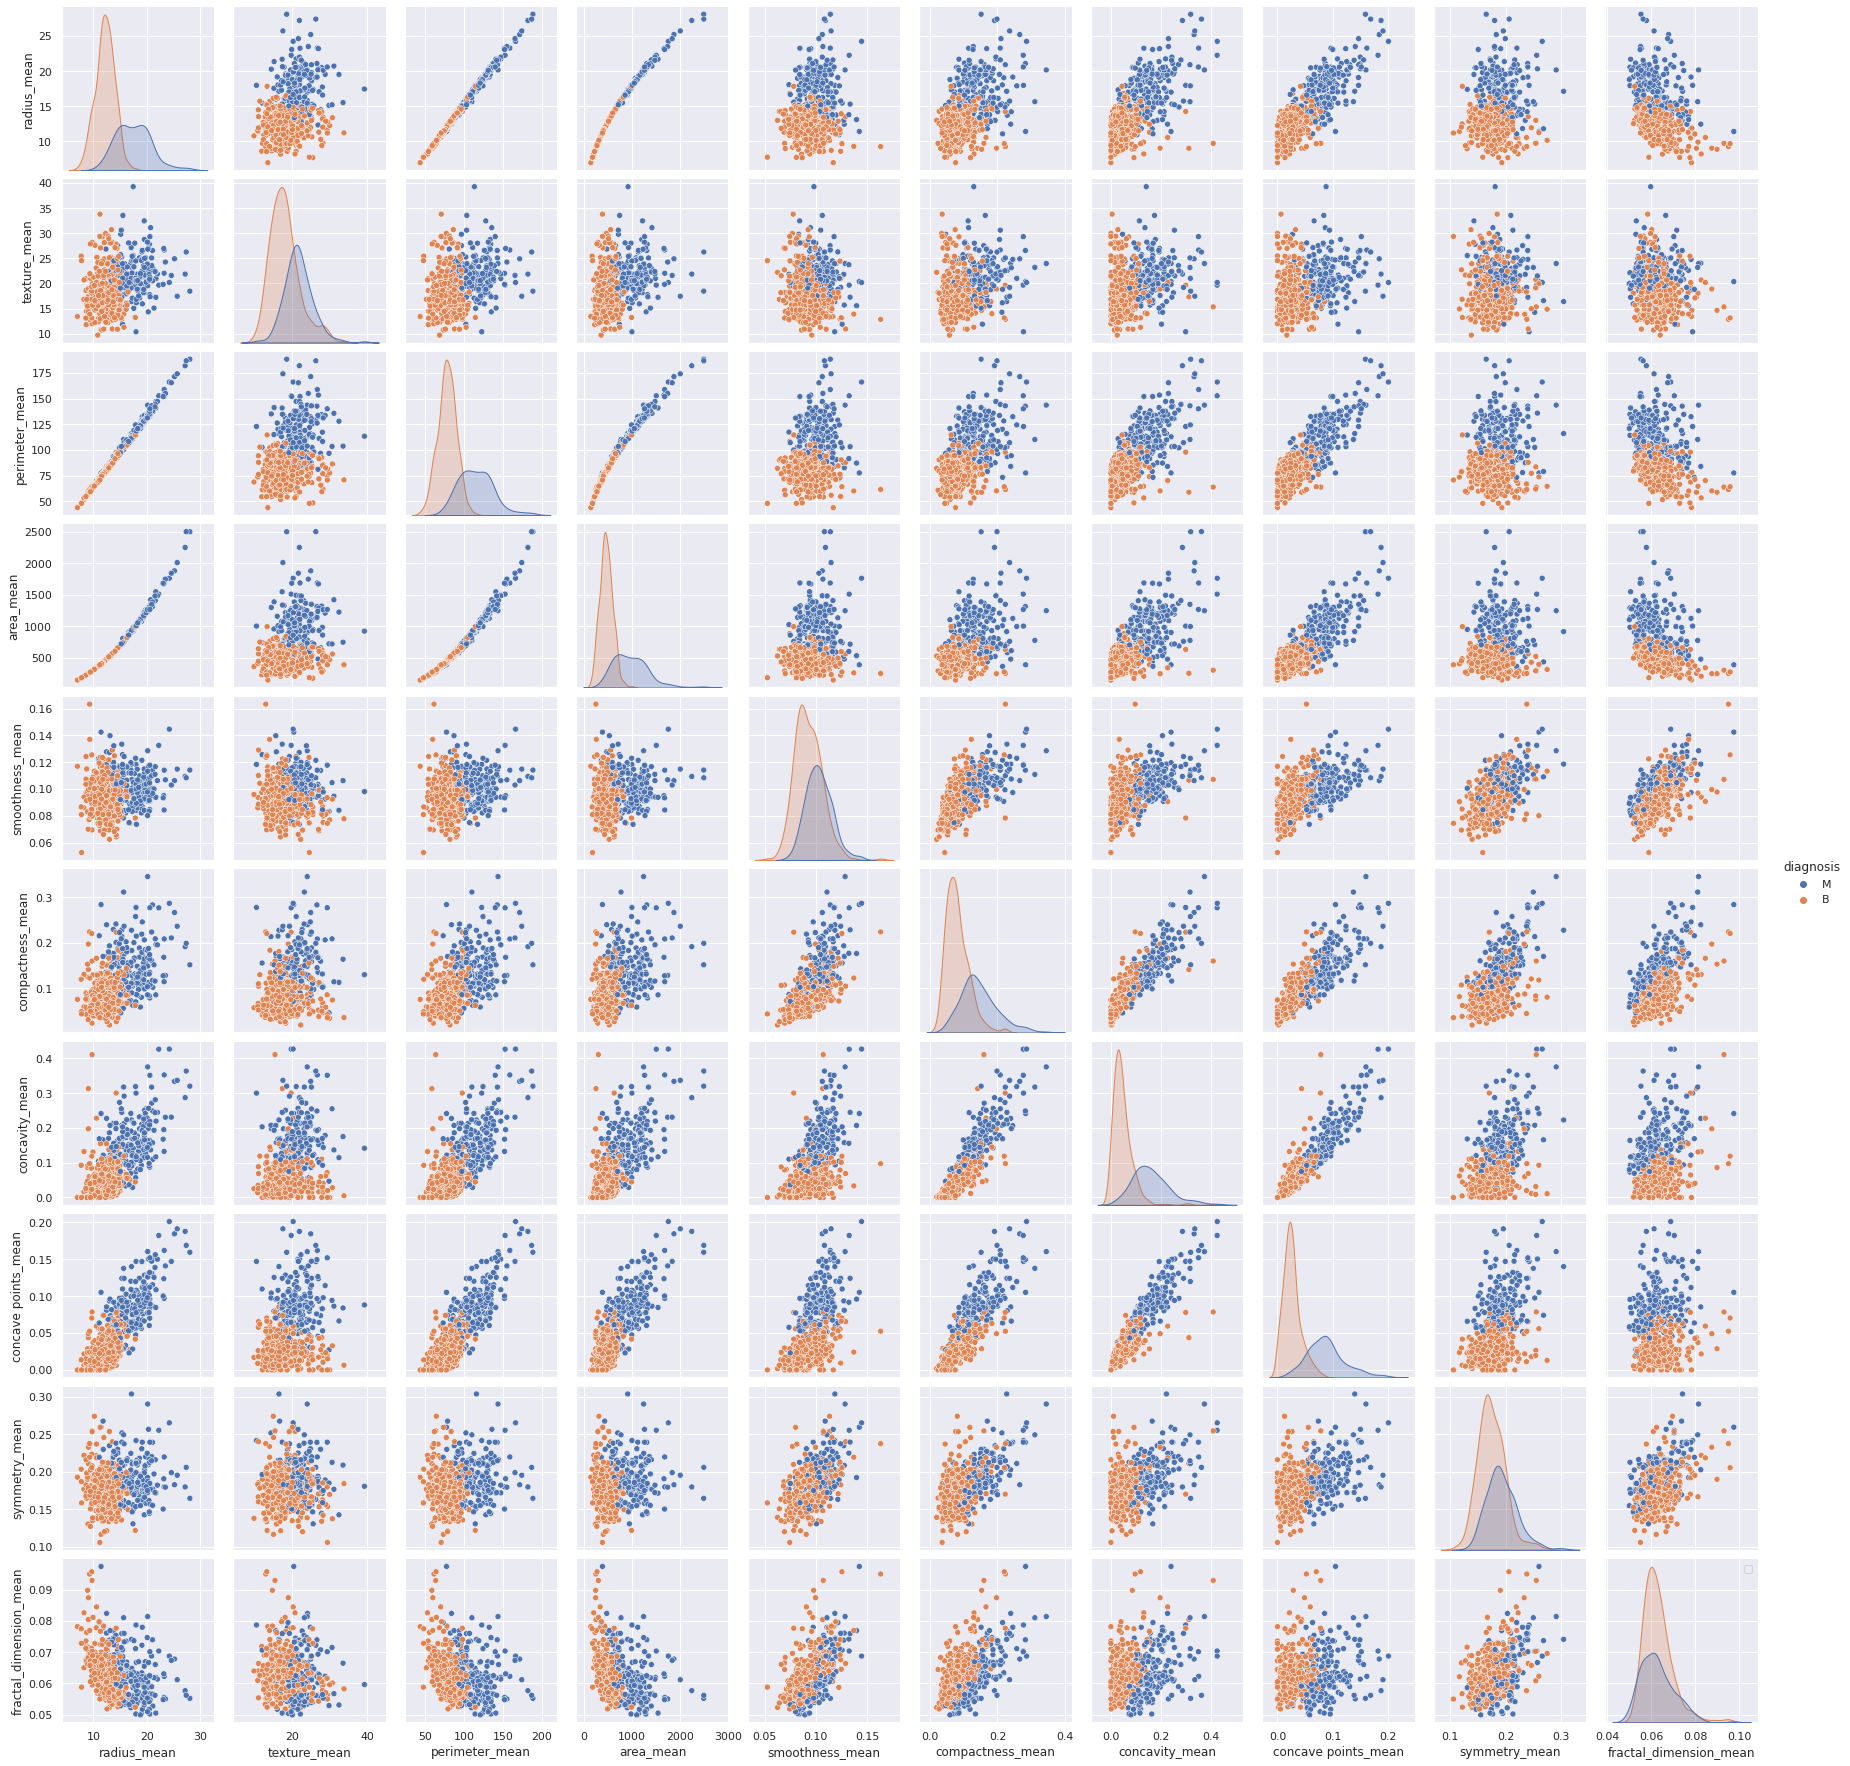

In [10]:
sns.set()

cols_to_pairplot = df.columns[:11]
sns.pairplot(df[cols_to_pairplot], hue="diagnosis")
plt.legend()
plt.show()

<h3>Plotting the Values of Each Variable</h3>

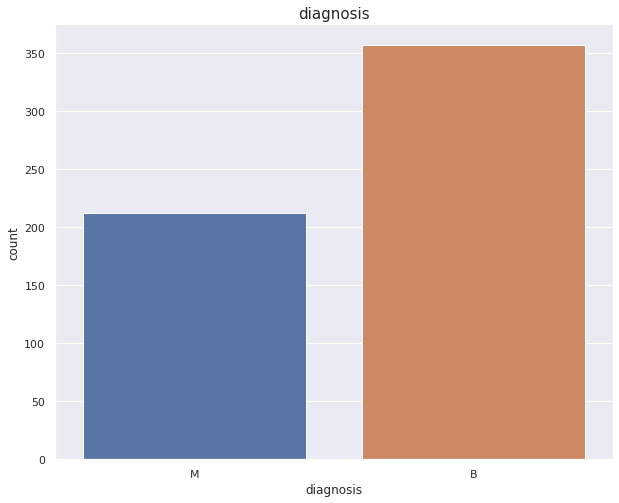

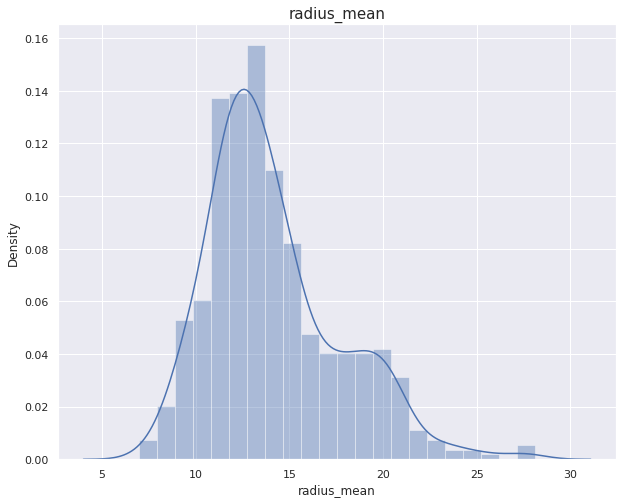

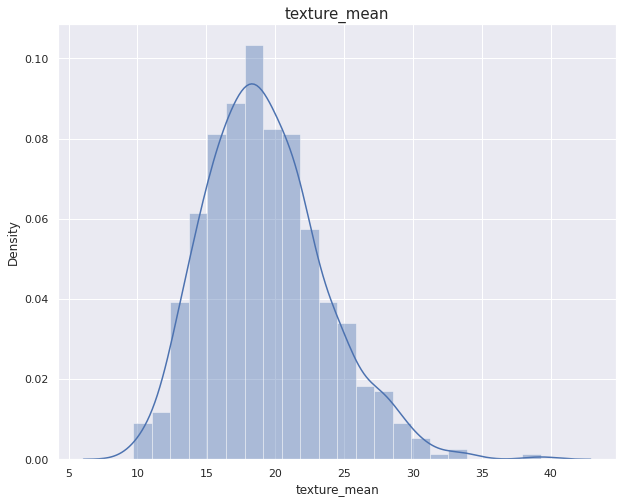

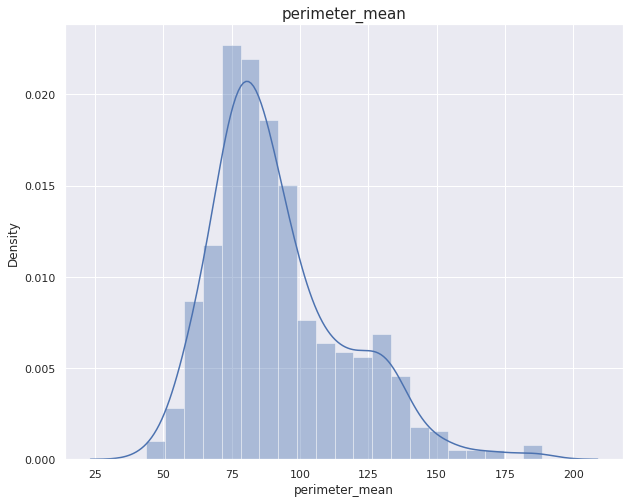

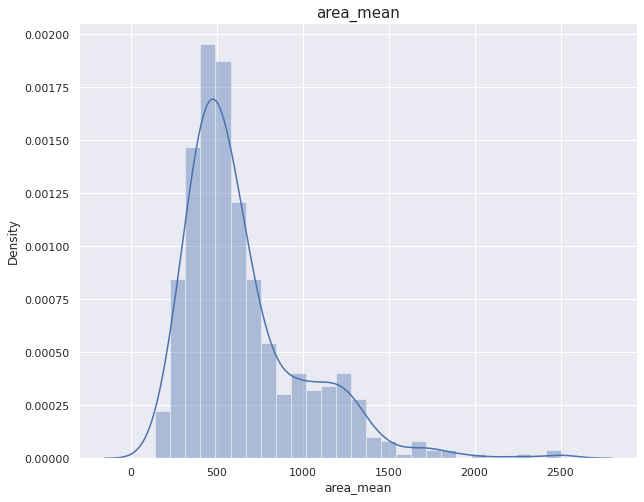

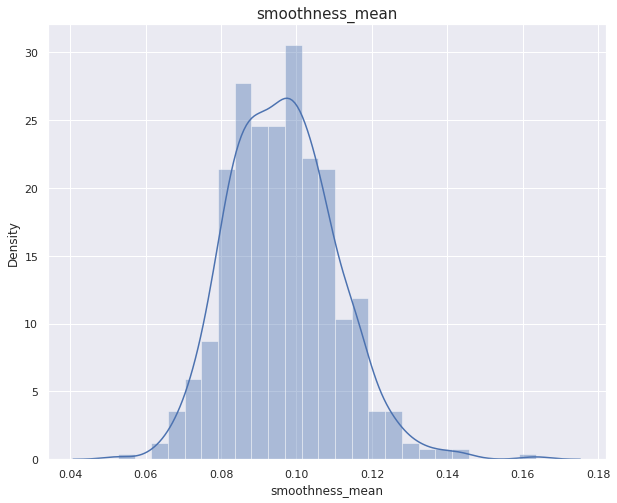

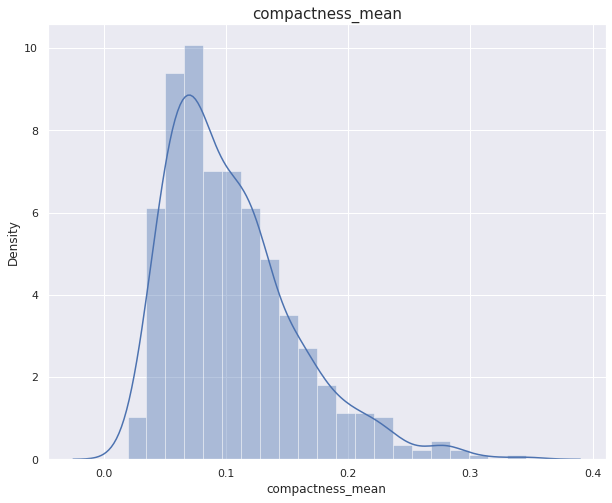

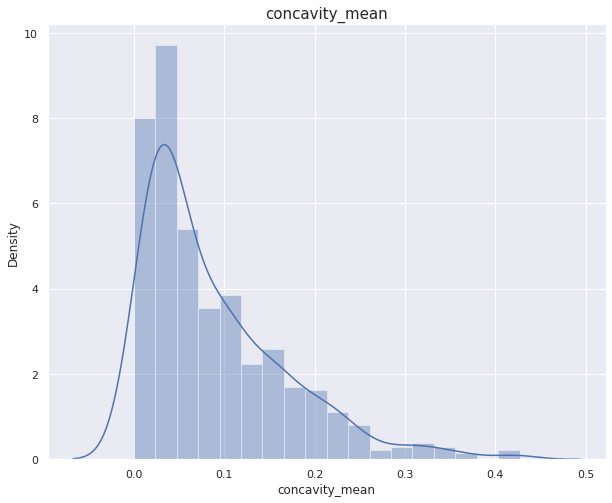

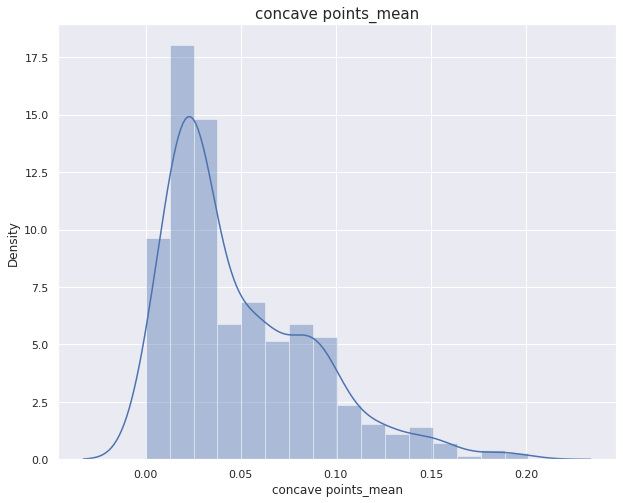

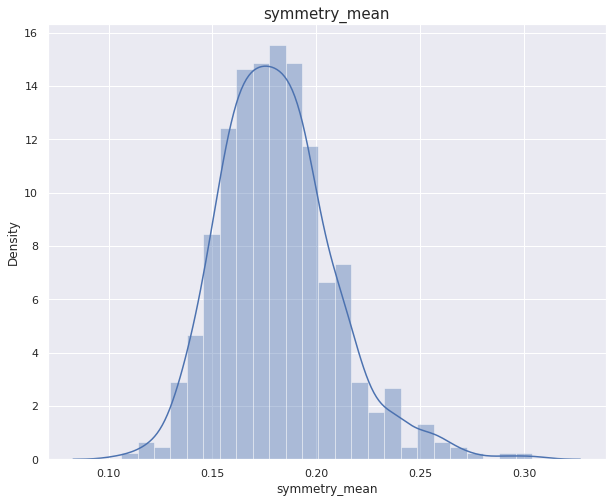

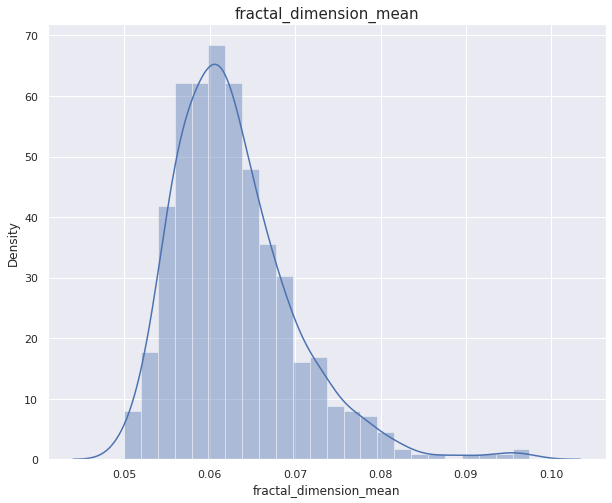

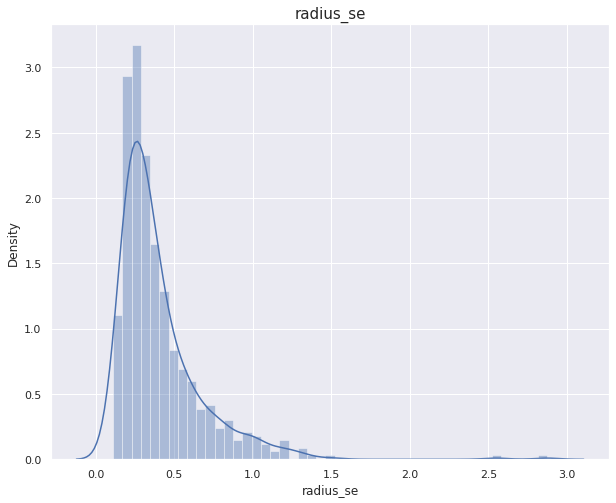

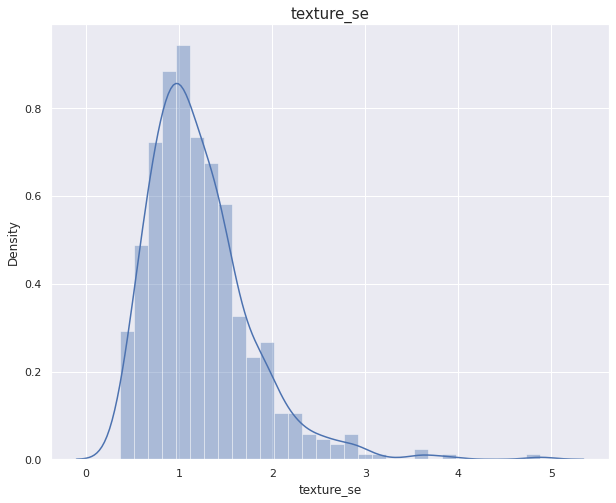

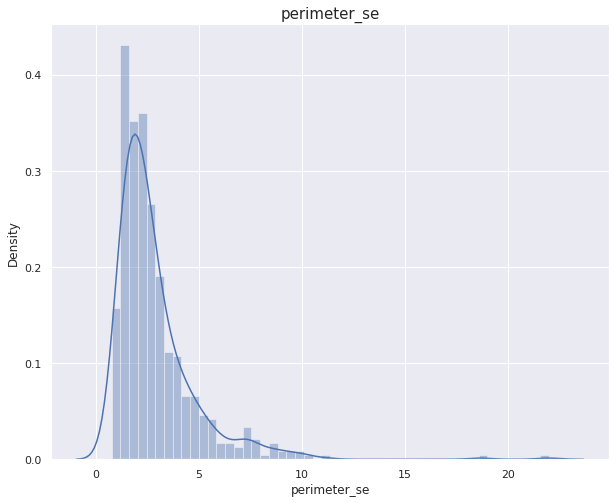

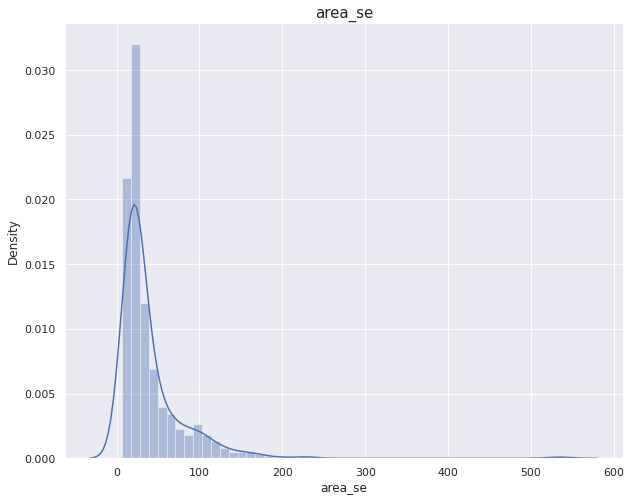

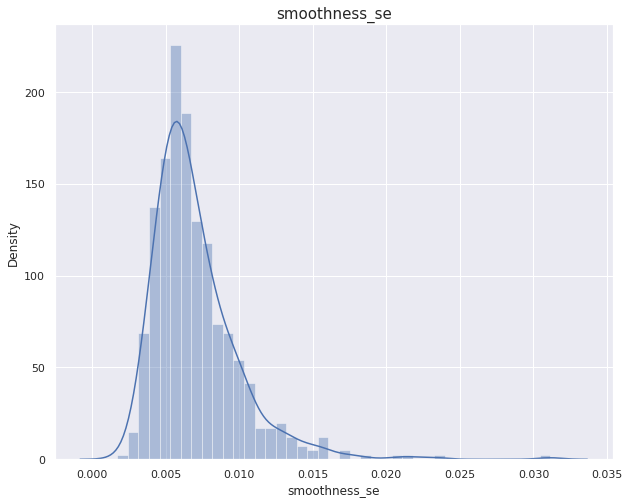

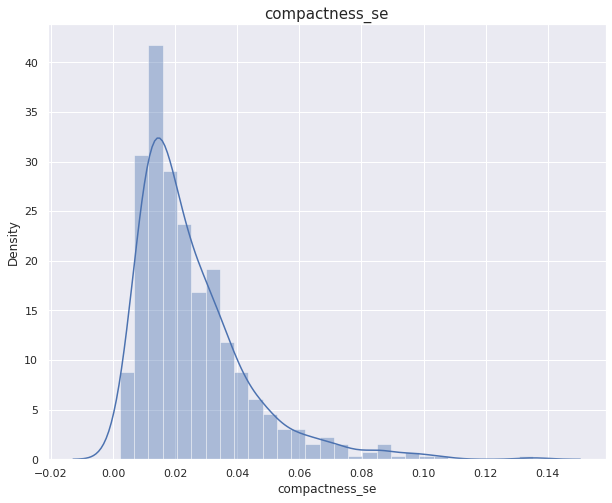

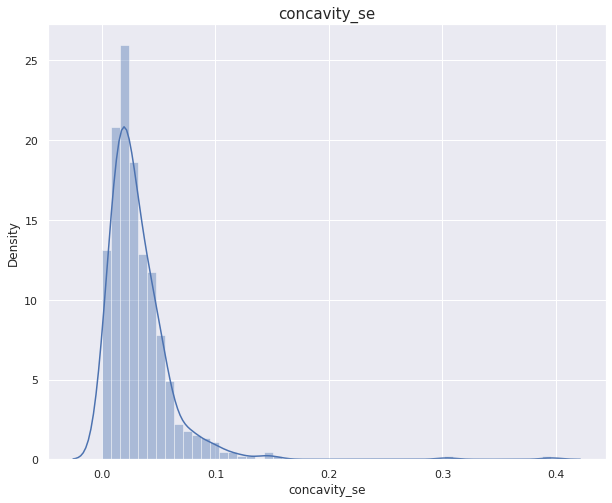

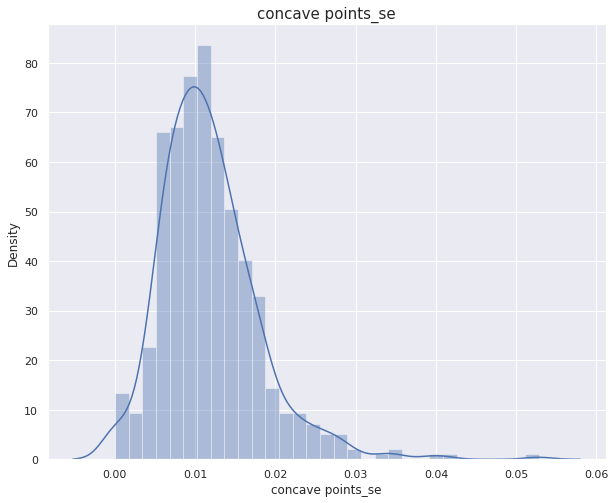

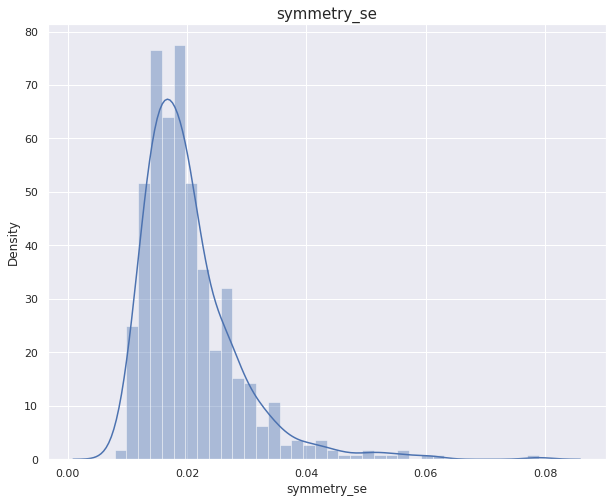

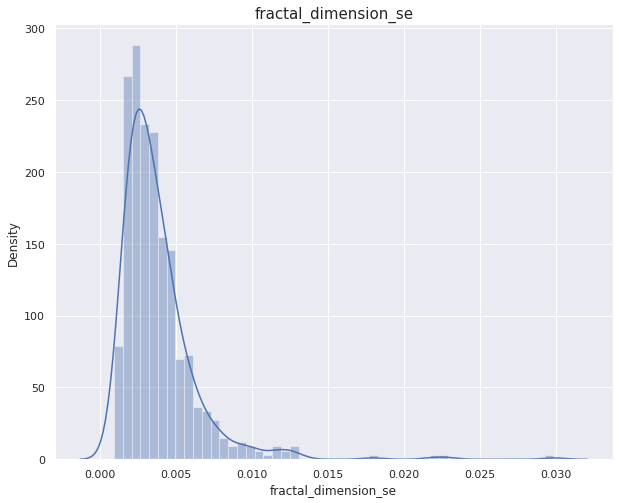

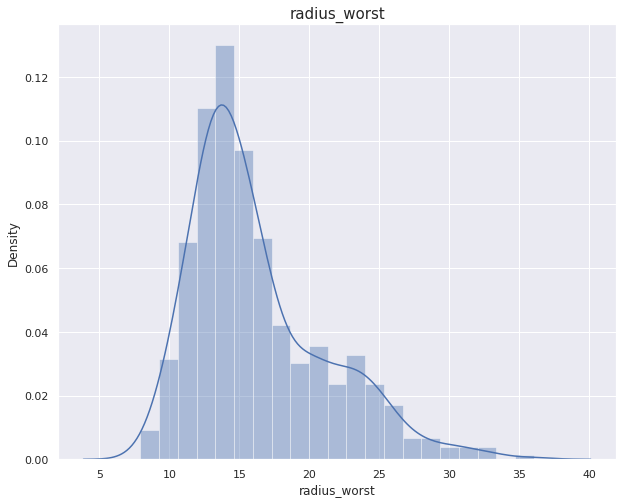

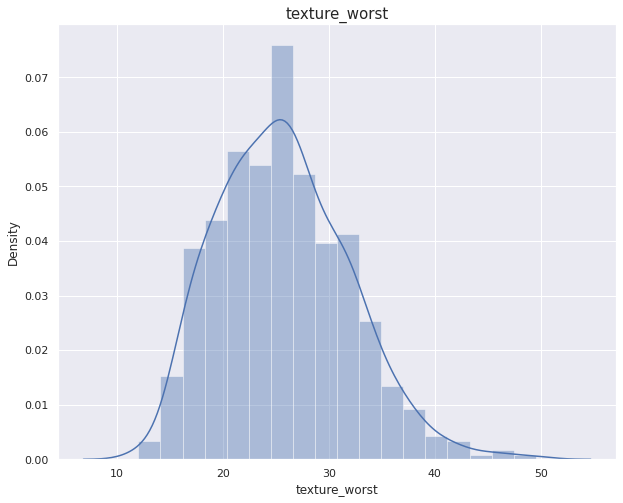

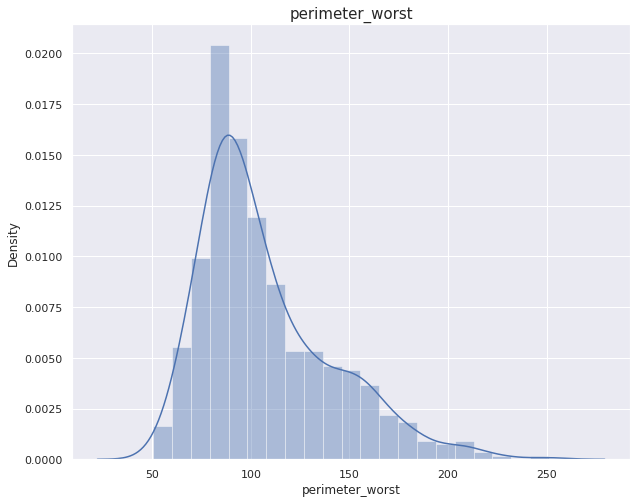

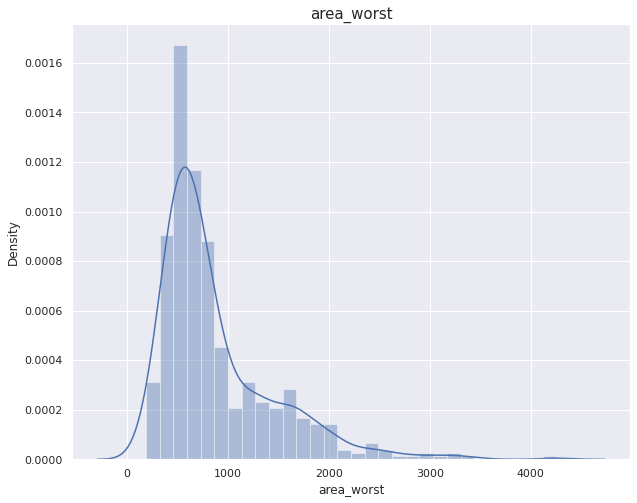

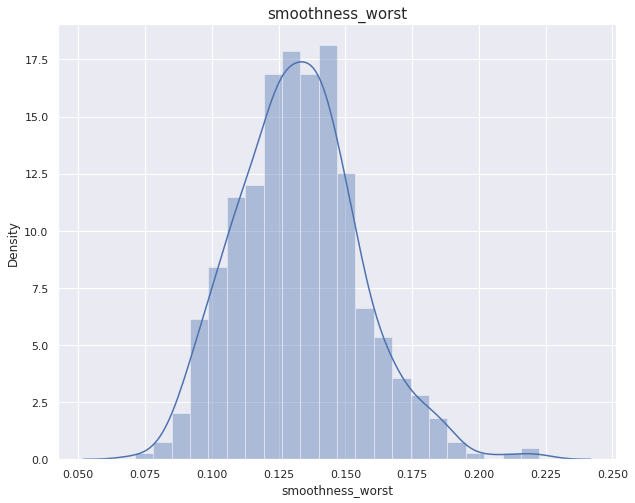

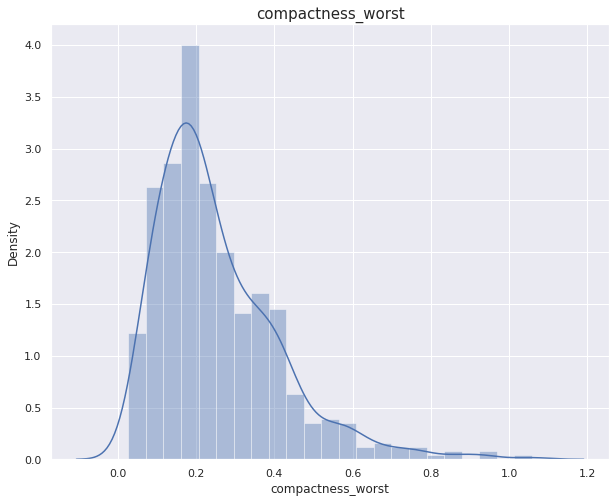

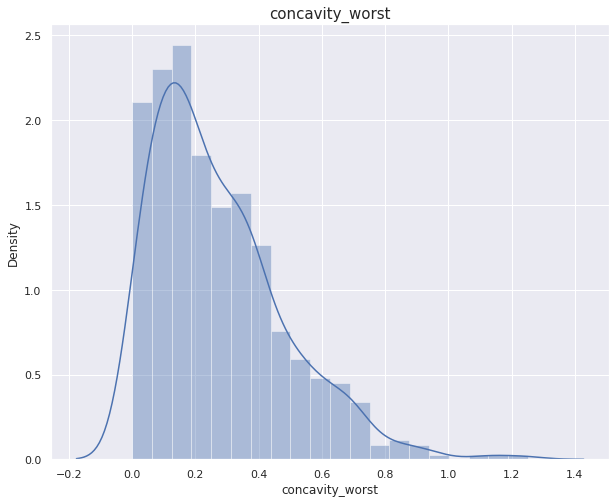

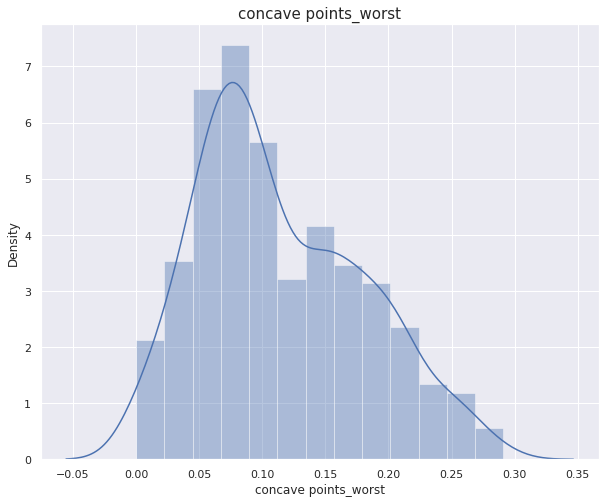

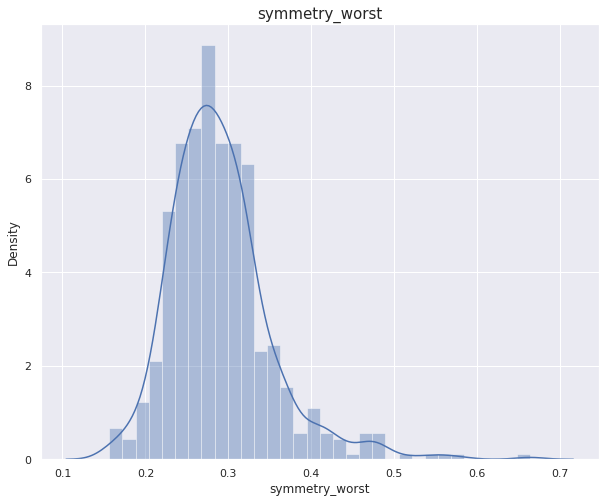

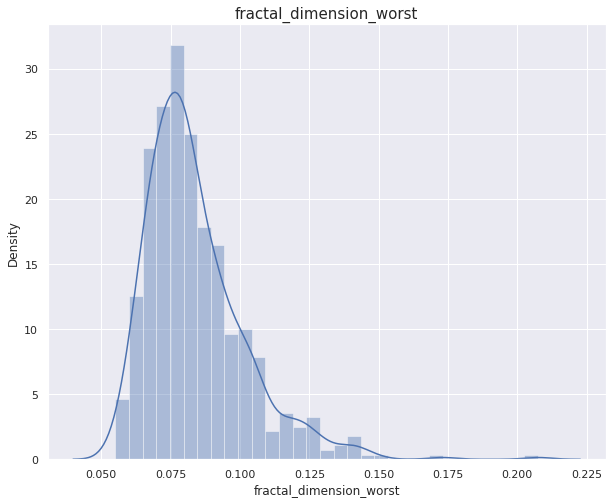

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(df["diagnosis"])
plt.title("diagnosis", size=15)
plt.show()

for col in df.drop("diagnosis", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

<h3>Relationship Between Each Variable and Target Variable (diagnosis)</h3>

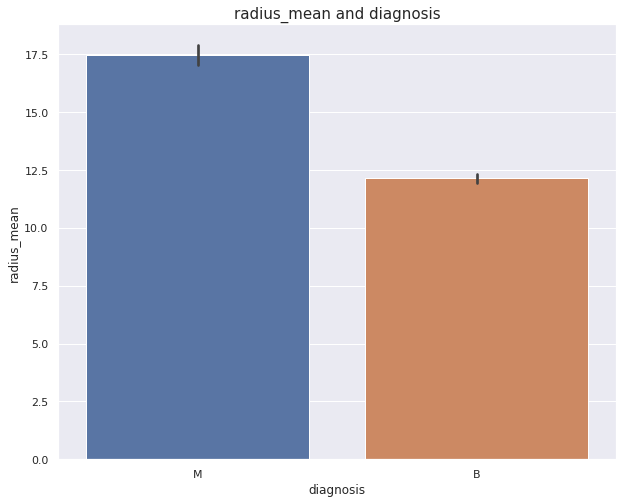

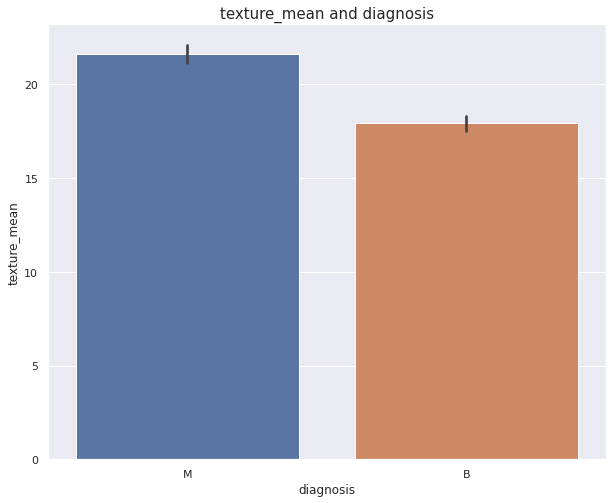

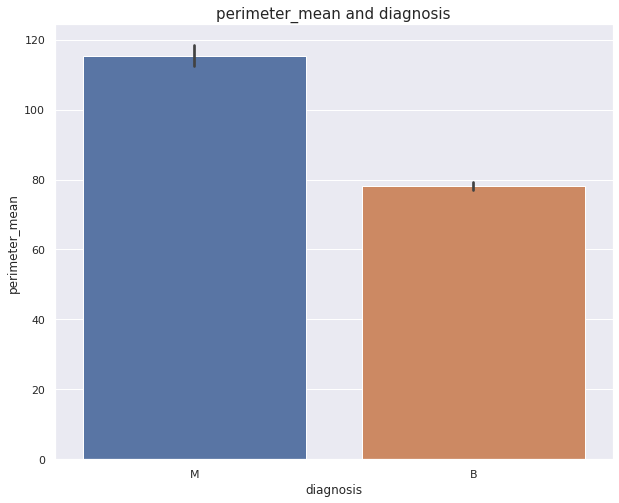

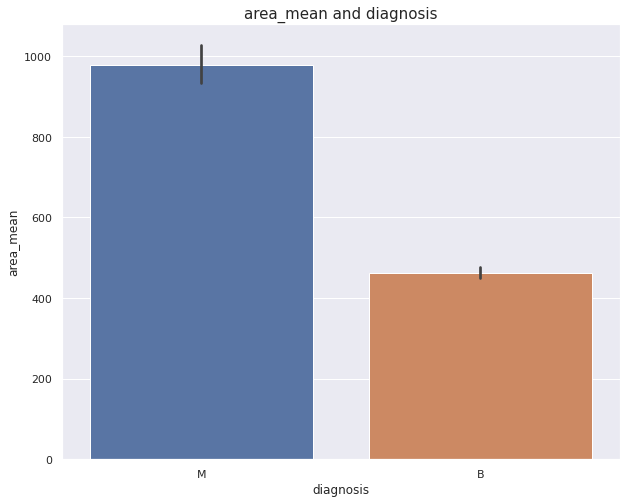

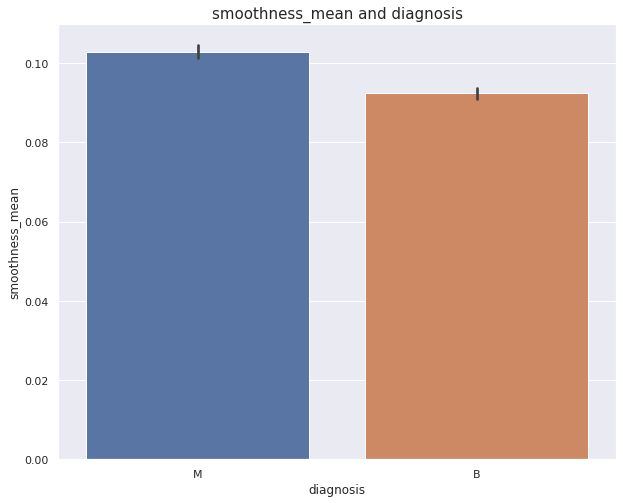

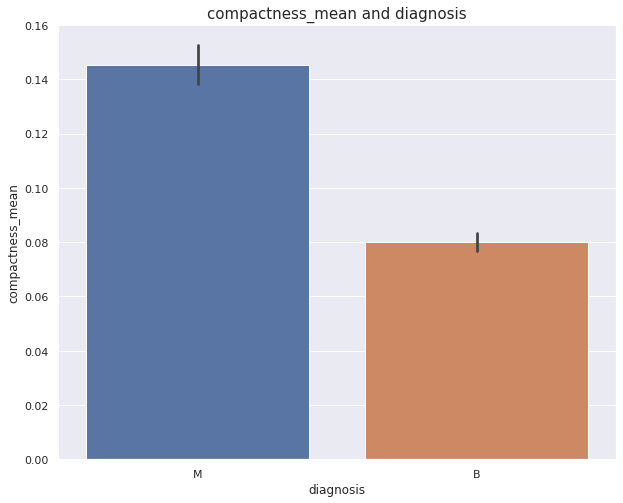

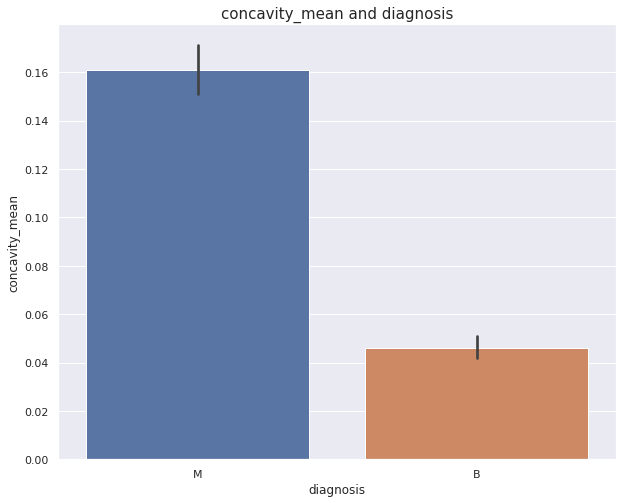

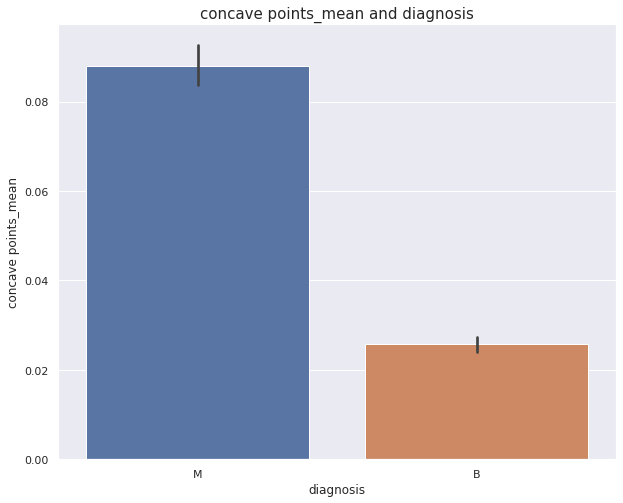

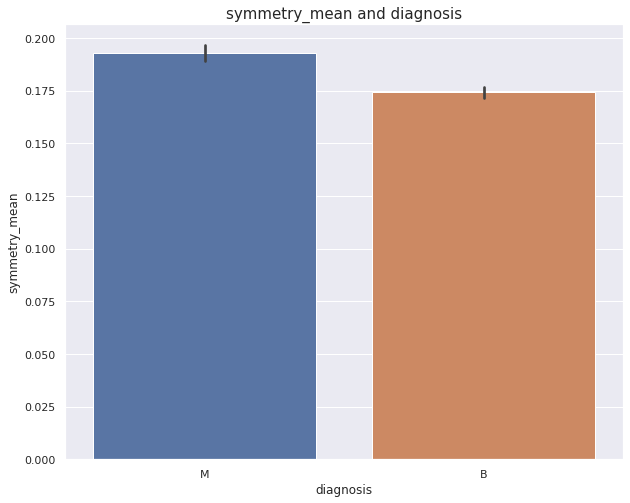

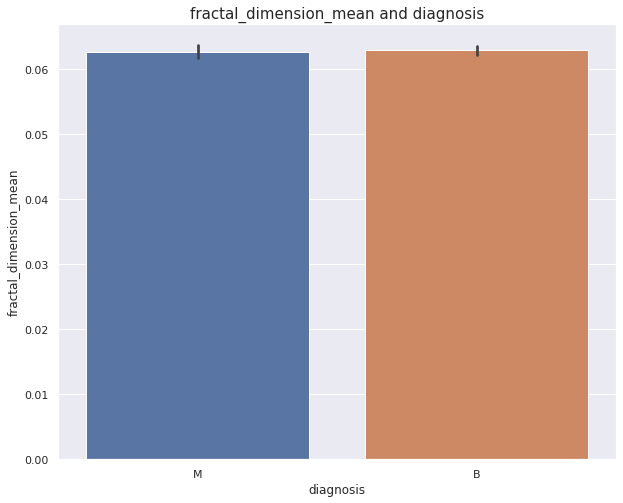

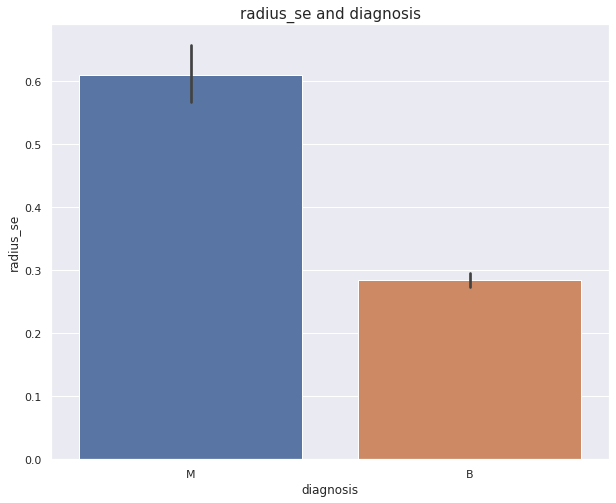

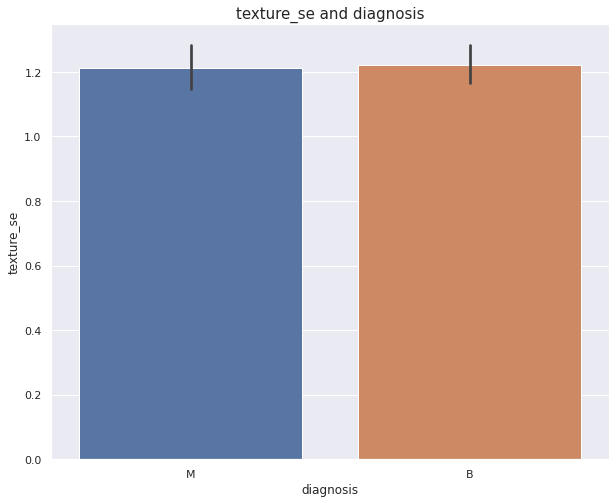

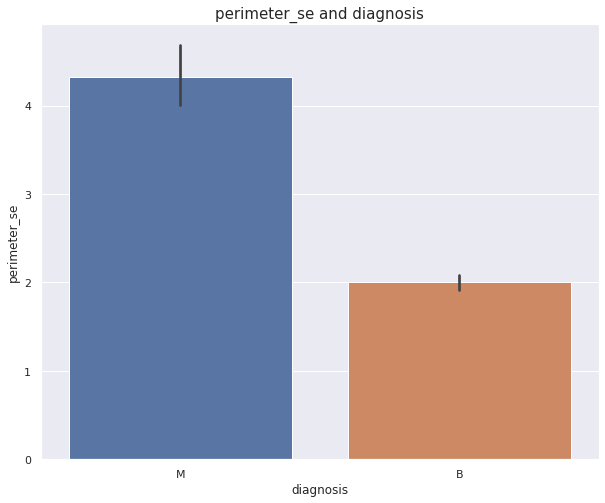

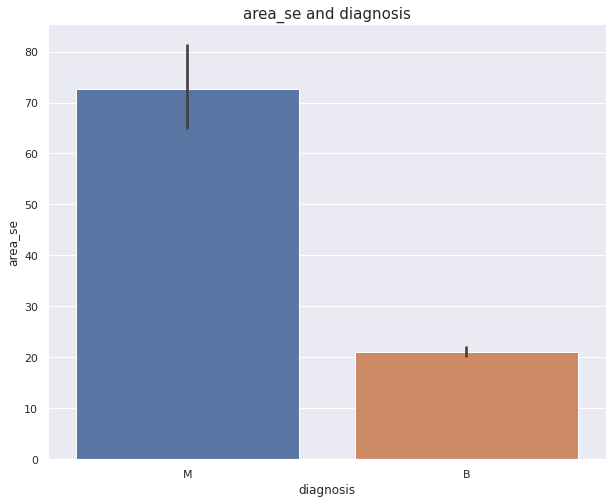

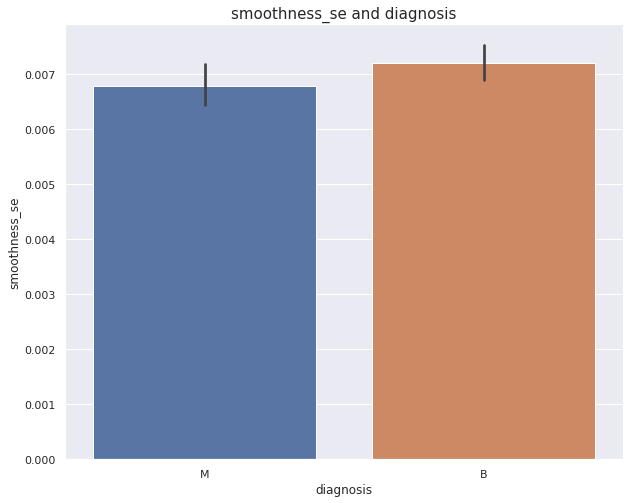

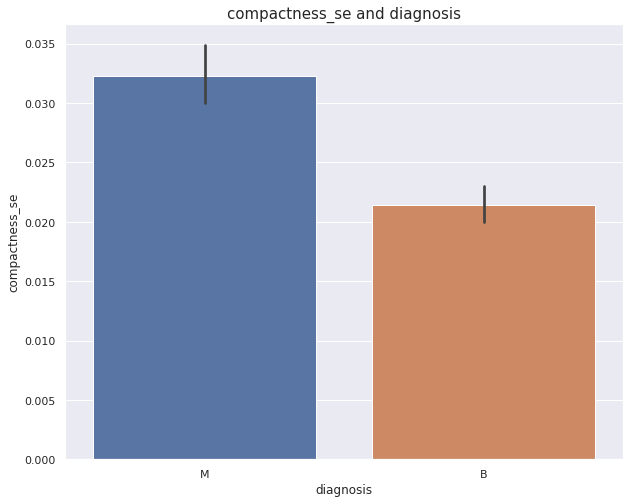

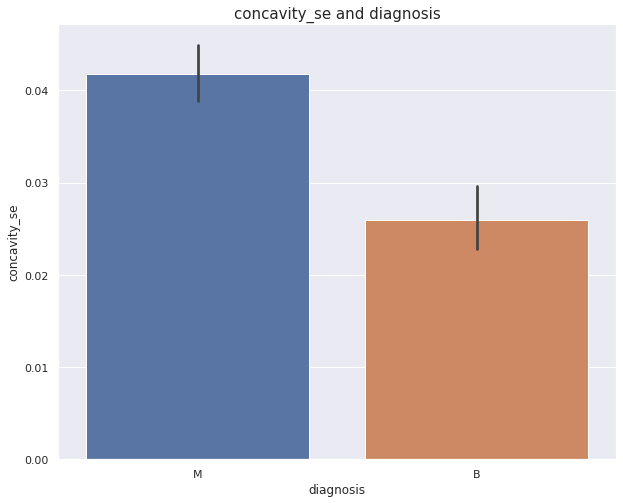

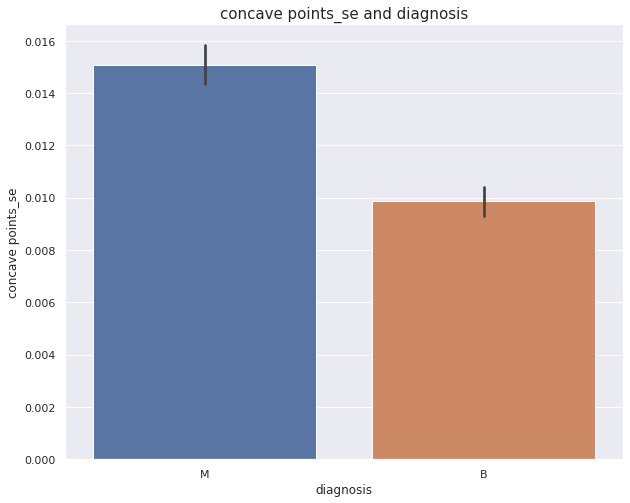

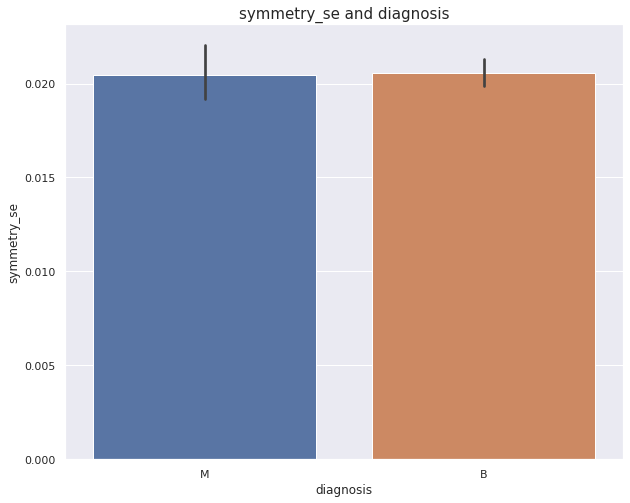

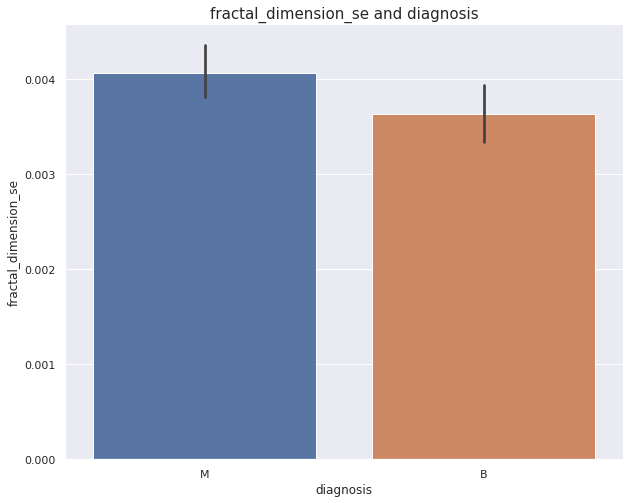

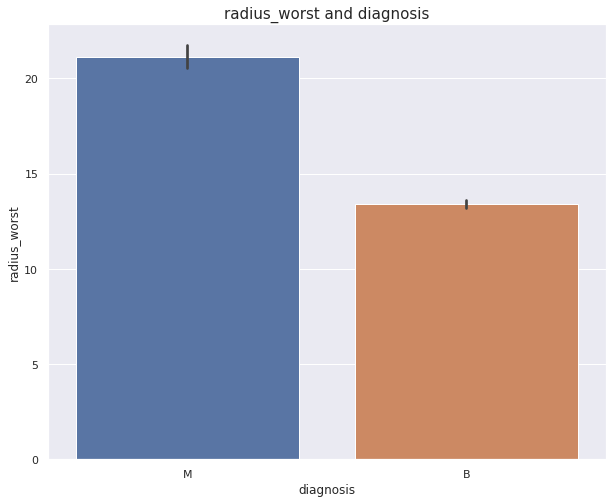

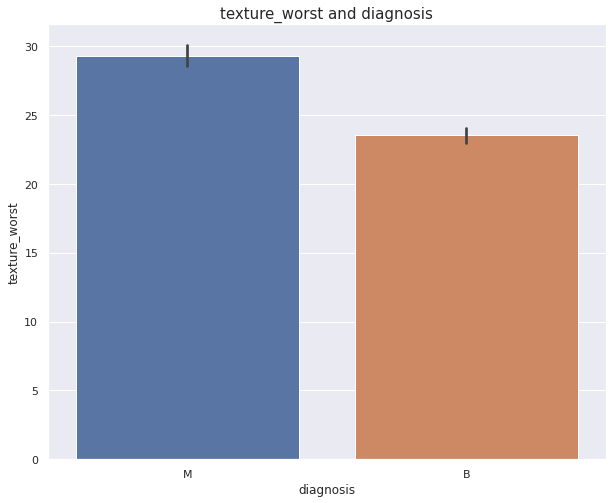

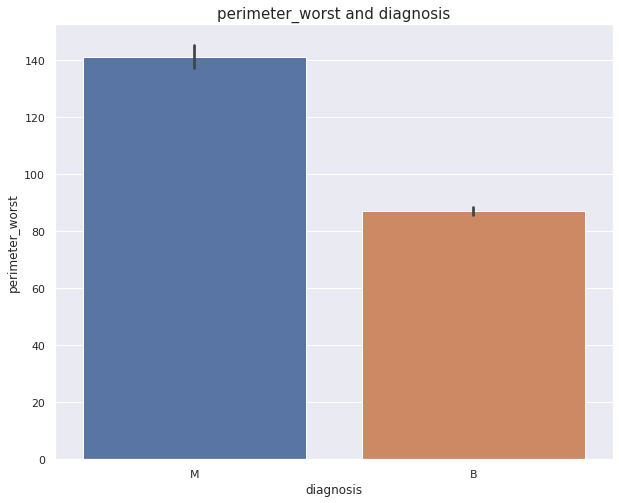

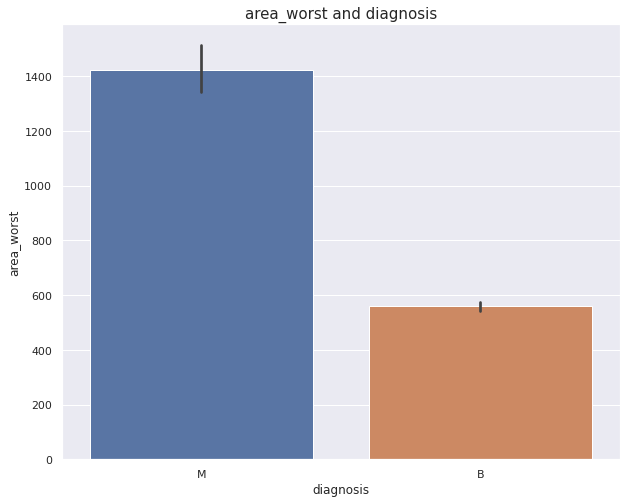

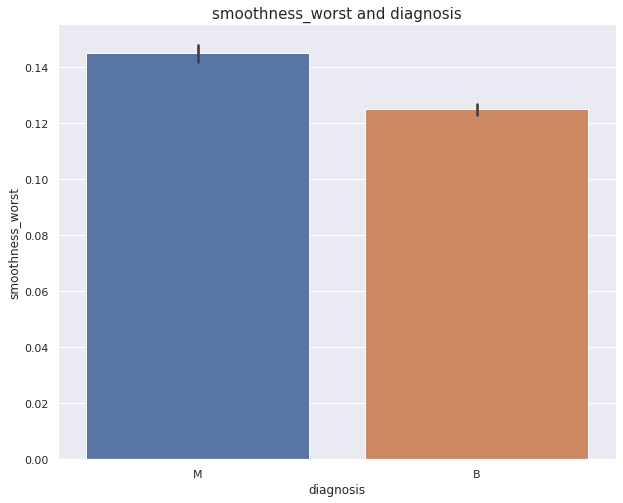

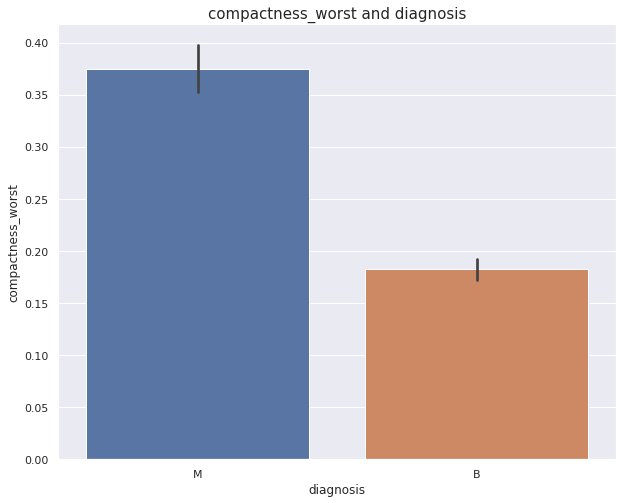

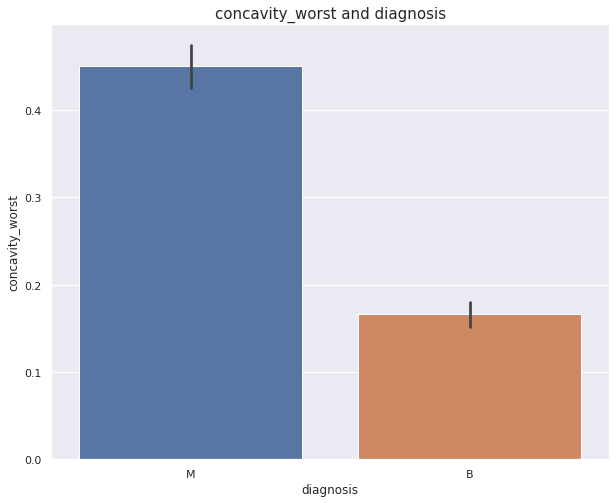

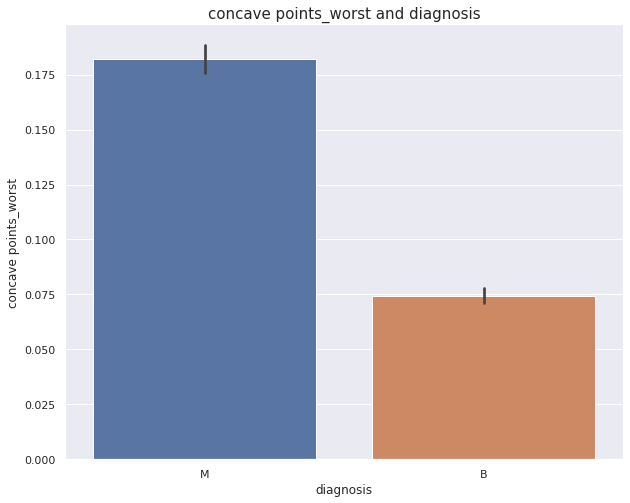

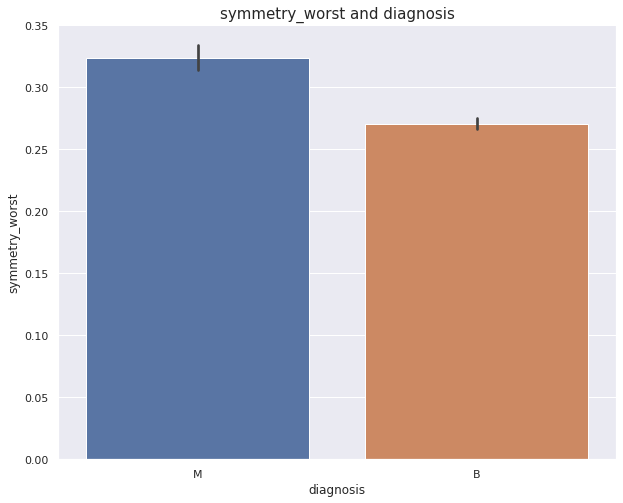

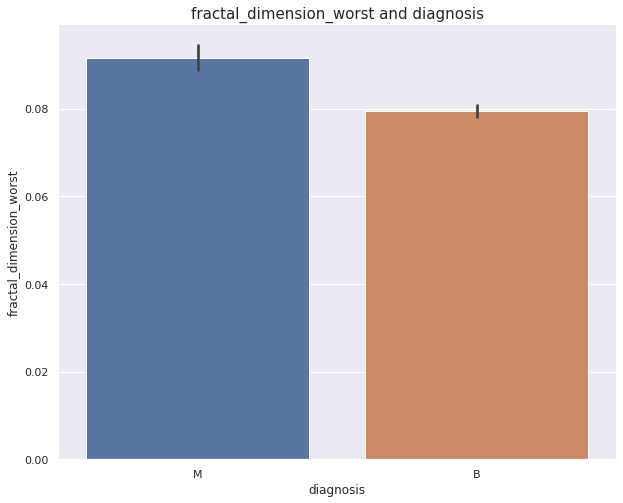

In [12]:
for col in df.drop("diagnosis", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df["diagnosis"], y=df[col])
    plt.title(f"{col} and diagnosis", size=15)
    plt.show()

***Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

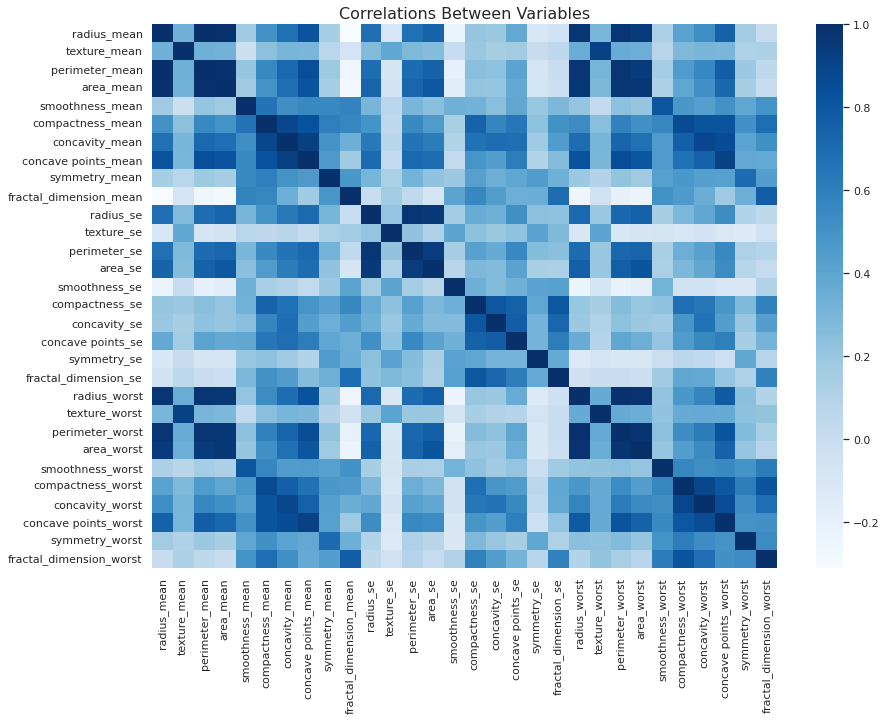

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

<h3>X, y Split</h3>

In [14]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"].replace({"B": 0, "M": 1})

<h3>Data Standardization</h3>

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Principal Component Analysis (PCA)

Principal Component Analysis is an unsupervised statistical technique used for Dimensionality Reduction. It combines the correlated features, creates the same number of features which are uncorrelated to one another and compresses most of the information (variance) into the first components. Hence, it helps us to handle the Multicollinearity which affects the ML models in a bad way.

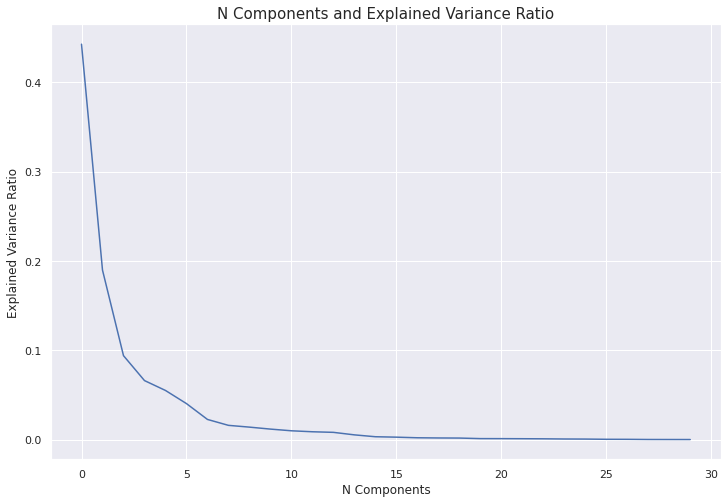

In [16]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(12,8))
plt.plot(pca.explained_variance_ratio_)
plt.title("N Components and Explained Variance Ratio", size=15)
plt.xlabel("N Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

***It looks like first 5 components hold most of the information.***

In [17]:
pca = PCA(n_components = 5)
X = pca.fit_transform(X)

***It can easily be seen that first 5 components hold over 84% of the variance present in the dataset.***

In [18]:
pca.explained_variance_ratio_.sum()

0.8473427431680038

<h3>Train-Test Split</h3>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Machine Learning Models

In [20]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

<h3>Logistic Regression</h3>

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.9883040935672515


<h3>Random Forest</h3>

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.9707602339181286


<h3>Gradient Boosting</h3>

In [23]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.9766081871345029


<h3>Support Vector Machines</h3>

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

Accuracy Score: 0.9707602339181286


<h3>Model Comparison Before Hyperparameter Tuning</h3>

In [25]:
models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
0          LogisticRegression        0.988304
2  GradientBoostingClassifier        0.976608
1      RandomForestClassifier        0.970760
3                         SVC        0.970760

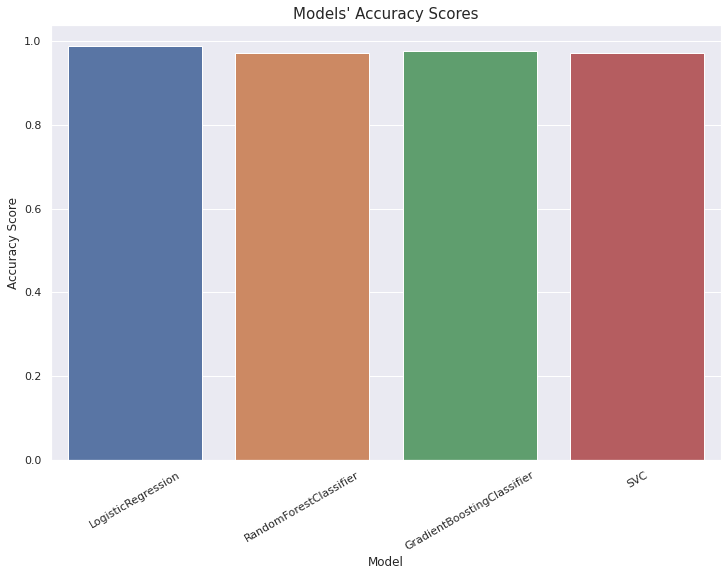

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

***Defining a ROC AUC Curve visualization function for the convenience of evaluation.***

In [27]:
def visualize_roc_auc_curve(model, model_name):
    pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    
    score = roc_auc_score(y_test, pred_prob[:, 1])
    
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle="--", color="orange", label="ROC curve (area = %0.5f)" % score)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{model_name} ROC Curve", size=15)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", prop={'size': 15})
    plt.show()

In [28]:
tuned_models = pd.DataFrame(columns=["Model", "Accuracy Score"])

<h3>Tuning the Logistic Regression</h3>

In [29]:
param_grid_log_reg = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [30]:
log_reg_params = grid_log_reg.best_params_
log_reg = LogisticRegression(**log_reg_params)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "LogisticRegression", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.9883040935672515


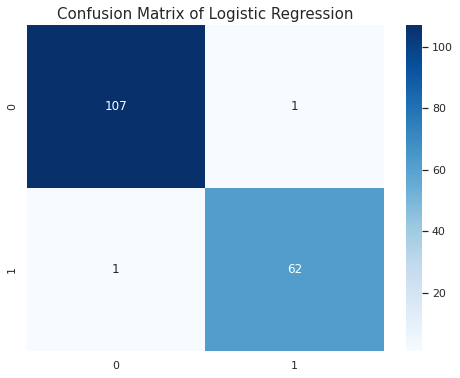

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Logistic Regression", size=15)
plt.show()

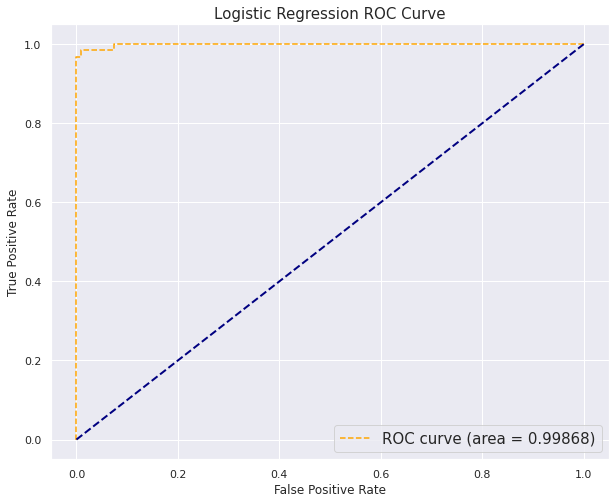

In [32]:
visualize_roc_auc_curve(log_reg, "Logistic Regression")

<h3>Tuning the Random Forest</h3>

In [33]:
param_grid_rfc = {"min_samples_split": [2, 3, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "n_estimators" :[100, 200, 500]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [34]:
rfc_params = grid_rfc.best_params_
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "RandomForestClassifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.9707602339181286


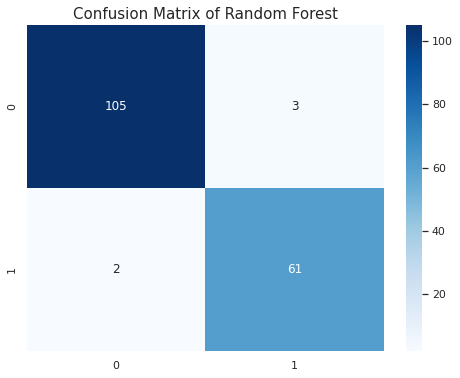

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

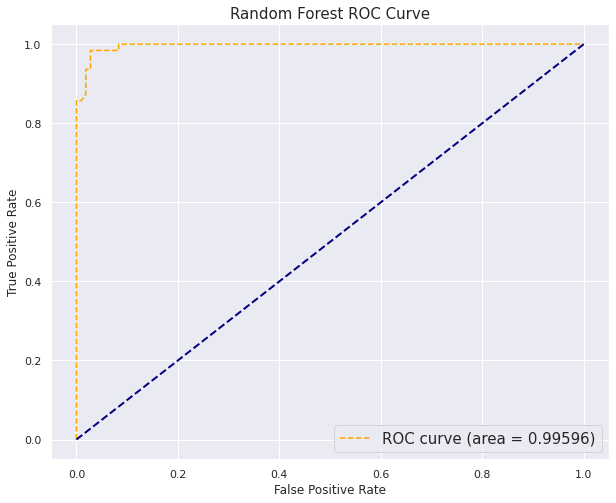

In [36]:
visualize_roc_auc_curve(rfc, "Random Forest")

<h3>Tuning the Gradient Boosting</h3>

In [37]:
param_grid_gbc = {'n_estimators' : [100, 200, 500],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [2, 3, 6],
                  'min_samples_leaf': [1, 2, 5]}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 6], 'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [38]:
gbc_params = grid_gbc.best_params_
gbc = GradientBoostingClassifier(**gbc_params)
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "GradientBoostingClassifier", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.9824561403508771


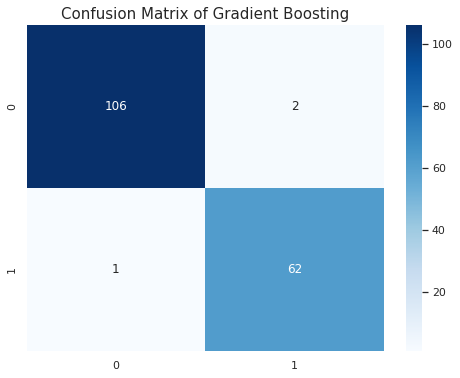

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Gradient Boosting", size=15)
plt.show()

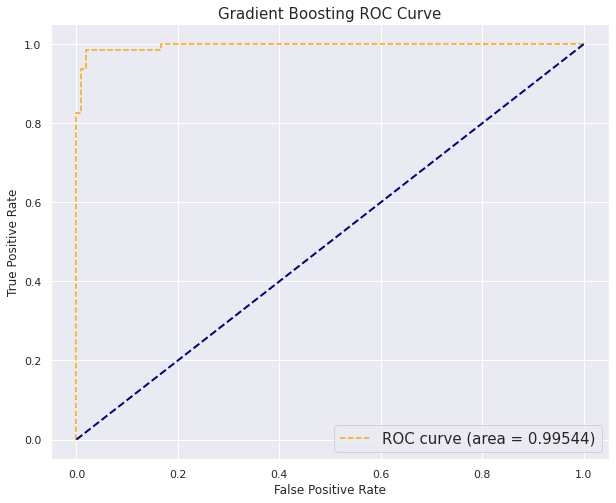

In [40]:
visualize_roc_auc_curve(gbc, "Gradient Boosting")

<h3>Tuning the Support Vector Machines</h3>

In [41]:
param_grid_svc = {'gamma': [ 0.001, 0.01, 0.1, 1, 10],
                  'C': [1, 10, 50, 100, 200, 300, 500, 1000]}

grid_svc = GridSearchCV(SVC(), param_grid_svc, scoring="accuracy", cv=5, verbose=0, n_jobs=-1)

grid_svc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 500, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [42]:
svc_params = grid_svc.best_params_
svc = SVC(**svc_params)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Accuracy Score:", score)

new_row = {"Model": "SVC", "Accuracy Score": score}
tuned_models = tuned_models.append(new_row, ignore_index=True)

Accuracy Score: 0.9824561403508771


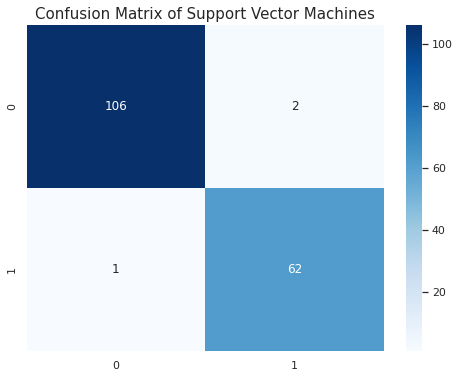

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix of Support Vector Machines", size=15)
plt.show()

***NOTE: If we take a look at the official technical documentation of SVC, we can observe that predict_proba() function may be inconsistent with predict() function. It sucks especially on the small datasets, that's why I don't prefer to plot ROC AUC Curve for SVC model.***

# Model Comparison After Hyperparameter Tuning

In [44]:
tuned_models.sort_values(by="Accuracy Score", ascending=False)

Model  Accuracy Score
0          LogisticRegression        0.988304
2  GradientBoostingClassifier        0.982456
3                         SVC        0.982456
1      RandomForestClassifier        0.970760

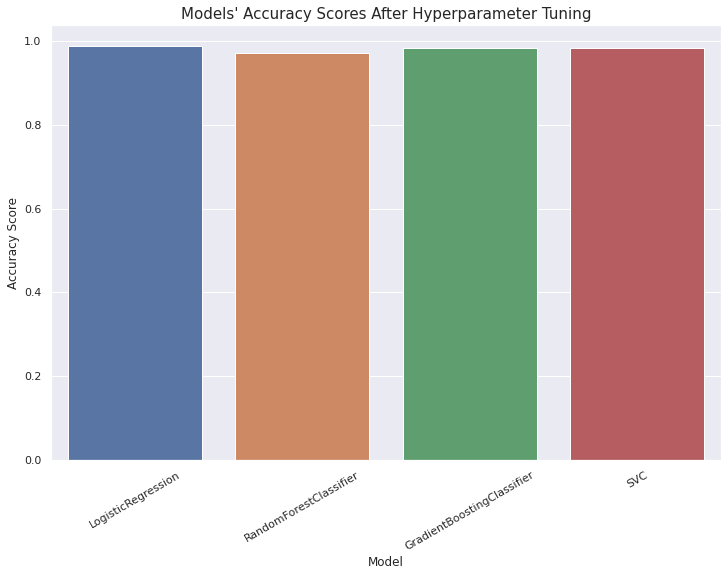

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["Accuracy Score"])
plt.title("Models' Accuracy Scores After Hyperparameter Tuning", size=15)
plt.xticks(rotation=30)
plt.show()

# Conclusion

**It can easily be observed that Logistic Regression is the one which yields the best scores among the four models that we built with the accuracy score of 0.988304. Also, it is important to pay attention to the increase in the accuracy scores of SVC and Gradient Boosting Classifier.**

<h1 style="font-family: Times New Roman;">Thank you so much for reading the notebook. Preparing notebooks is taking a great deal of time. If you liked it, please do not forget to give an upvote. Peace Out ✌️ ...</h1>